# Loan Default Prediction

### Importing Libraries


In [6]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In this code cell, we import the necessary libraries for our loan default prediction project. These libraries include:

- `numpy` and `pandas` for data manipulation and analysis.
- `seaborn` and `matplotlib.pyplot` for data visualization.
- `LabelEncoder` from `sklearn.preprocessing` for encoding categorical variables.
- `train_test_split` from `sklearn.model_selection` to split the dataset into training and testing sets.
- `StandardScaler` from `sklearn.preprocessing` for feature scaling.

Additionally, we suppress any warning messages using `warnings.filterwarnings('ignore')` to improve readability of our notebook.


## Load Dataset

In [2]:
df = pd.read_csv("Loan_default.csv")


In this code cell, we load the dataset `Loan_default.csv` into a Pandas DataFrame (`df`). This dataset contains information relevant to our loan default prediction project. 



In [3]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0



In this code cell, we display the first few rows of the dataset using the `head()` function to gain an initial understanding of its structure and contents. This allows us to quickly inspect the format of the data and identify any potential issues or patterns.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   


In this code cell, we use the `info()` method to obtain information about the dataset's structure, including the data types of each column and the presence of any missing values. This allows us to assess the completeness and cleanliness of the dataset before proceeding with further analysis and modeling.



In [8]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000



In this code cell, we generate descriptive statistics for the numerical features in the dataset using the `describe()` method. This provides summary statistics such as mean, standard deviation, minimum, maximum, and quartiles for each numerical column. 

By examining these statistics, we gain insights into the central tendency, dispersion, and distribution of the numerical variables in the dataset. This information helps us understand the range and variability of the data, which is crucial for further analysis and modeling.



In [14]:
df.drop("LoanID",axis=1,inplace=True)

In this code cell, we remove the column "LoanID" from the dataset using the `drop()` method with the `inplace=True` parameter. The "LoanID" column is dropped along the specified axis (axis=1), indicating columns.

The removal of this column is performed because it does not contribute to the loan default prediction task and is unnecessary for our analysis. By dropping irrelevant columns, we streamline the dataset and focus only on the relevant features for modeling.



# Data Visualization

0    225694
1     29653
Name: Default, dtype: int64


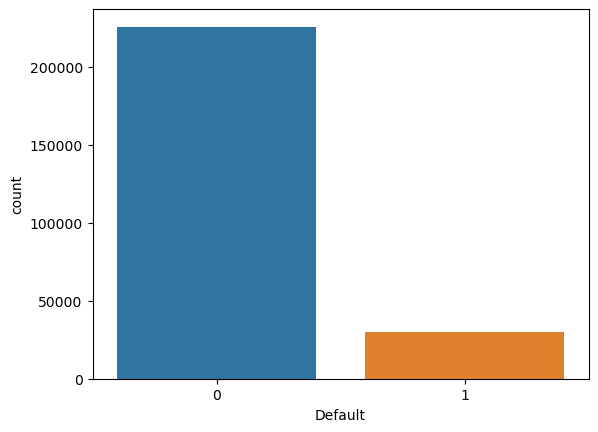

In [11]:
print(df['Default'].value_counts())
sns.countplot(df['Default'])
plt.show()



In this code cell, we create a count plot using Seaborn's `countplot()` function to visualize the distribution of the target variable "Default" in the dataset. The count plot displays the frequency of each class (e.g., defaulted and non-defaulted loans) in the target variable.

By visualizing the distribution of the target variable, we gain insights that the given dataset is highly **imbalance**, which can influence the modeling process.



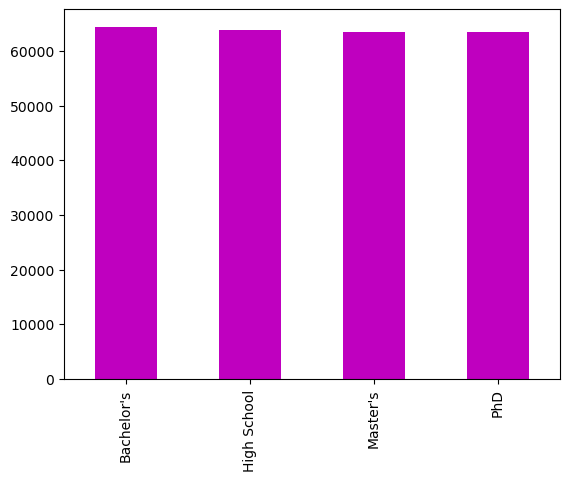

In [25]:
df["Education"].value_counts().plot(kind='bar',color='m')
plt.show()


In this code cell, we generate a bar plot to visualize the distribution of education levels among the borrowers. We use the `value_counts()` method to count the occurrences of each education level in the "Education" column and then plot the results using the `plot()` function with `kind='bar'` parameter.

The bar plot provides a clear overview of the distribution of education level.


So from the graph we can say that for each education level count plot is almost same



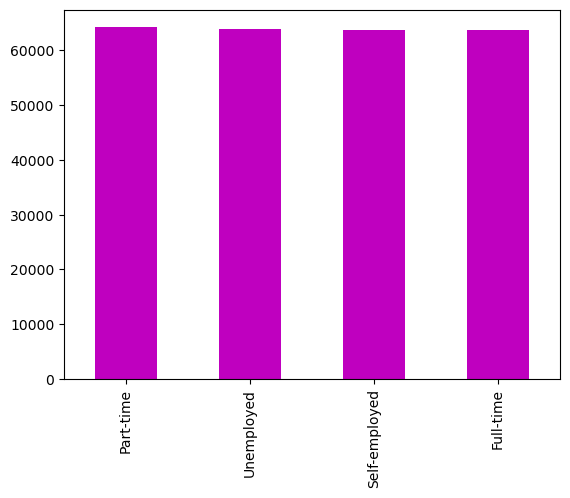

In [26]:
df["EmploymentType"].value_counts().plot(kind='bar',color='m')
plt.show()

So from the graph we can say that for each employment type count plot is almost same

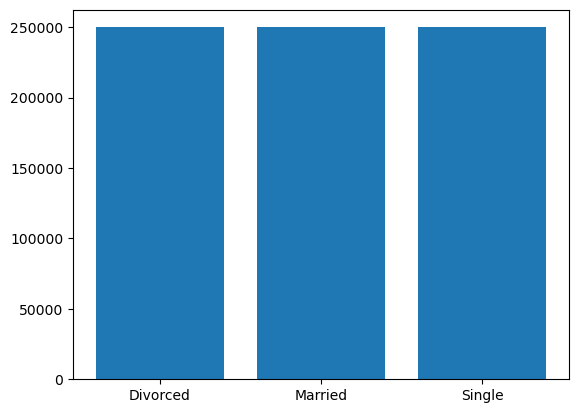

In [45]:
plt.bar(df["MaritalStatus"],df["LoanAmount"])
plt.show()

So from the graph we can say that for each Marital status Loan amount is almost same

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

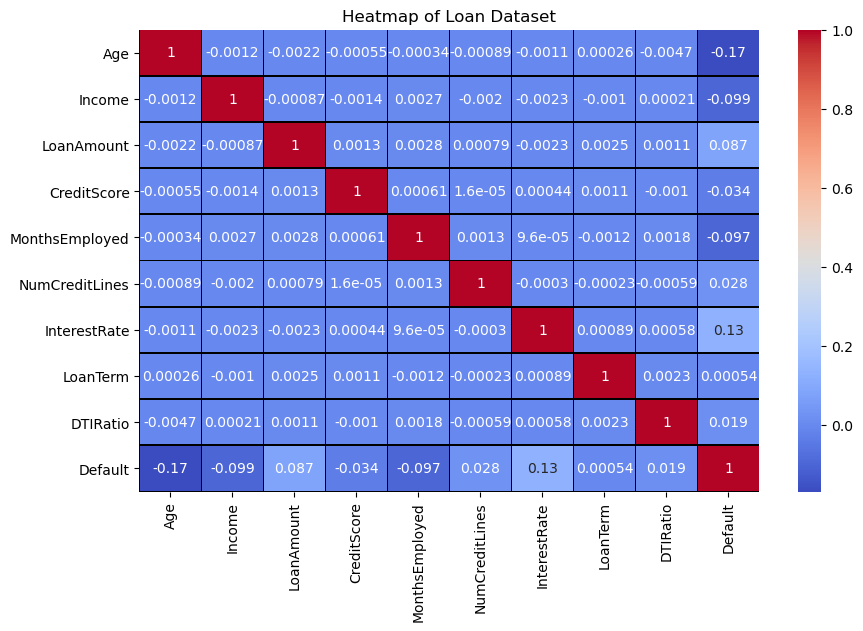

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Heatmap of Loan Dataset')
plt.show()


In this code cell, we create a heatmap visualization to explore the correlation between different features in the dataset. We utilize Seaborn's `heatmap()` function to generate the heatmap, which visualizes the correlation matrix of the numerical features in the dataset.





## Encoding Categorical Variables

In [20]:
df_encoded = pd.get_dummies(df, columns=['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'], drop_first=True)


In this code cell, we perform one-hot encoding on categorical variables in the dataset using Pandas' `get_dummies()` function. Categorical variables such as 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', and 'HasCoSigner' are specified in the `columns` parameter.

One-hot encoding converts categorical variables into binary vectors, where each category becomes a binary column (dummy variable). The `drop_first=True` parameter is used to drop the first level of each categorical variable to prevent multicollinearity in the dataset.

The resulting DataFrame `df_encoded` contains the original numerical features along with the one-hot encoded binary variables representing the different categories of each categorical feature.



In [21]:
df_encoded

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,0,0,0,1,1,0,0,0,1,1
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0,1,0,0,0,0,0,0,1,1
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,1,0,0,1,1,0,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0,1,0,0,0,1,0,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,...,0,1,0,0,0,0,0,0,1,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,...,0,0,0,0,0,0,0,1,0,0
255344,56,84820,208294,597,70,3,5.29,60,0.50,0,...,0,1,0,1,1,0,0,0,0,1
255345,42,85109,60575,809,40,1,20.90,48,0.44,0,...,0,0,1,1,1,0,0,0,1,0


In [10]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  int64  
 1   Income                        255347 non-null  int64  
 2   LoanAmount                    255347 non-null  int64  
 3   CreditScore                   255347 non-null  int64  
 4   MonthsEmployed                255347 non-null  int64  
 5   NumCreditLines                255347 non-null  int64  
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  int64  
 8   DTIRatio                      255347 non-null  float64
 9   Default                       255347 non-null  int64  
 10  Education_High School         255347 non-null  uint8  
 11  Education_Master's            255347 non-null  uint8  
 12  Education_PhD                 255347 non-nul

##  Feature Scaling

In [12]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])



In this code cell, we perform feature scaling on the numerical features of the dataset using the `StandardScaler` from scikit-learn. Feature scaling is a preprocessing technique that standardizes the range of numerical features, making them more comparable and improving the performance of certain machine learning algorithms.

We instantiate a `StandardScaler` object `scaler` to standardize the numerical features. The `fit_transform()` method is then applied to the selected numerical columns (`numerical_cols`) in the DataFrame `df_encoded`. This method computes the mean and standard deviation of each feature and then scales the features accordingly.

After feature scaling, the numerical features in the dataset have a mean of 0 and a standard deviation of 1, ensuring that they have a consistent scale and distribution.



## Train Test Split

In [37]:

X = df_encoded.drop('Default', axis=1)
y = df_encoded['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In this code cell, we split the preprocessed dataset into training and testing sets for model training and evaluation. 

- The features (`X`) are obtained by dropping the target variable ('Default') from the preprocessed DataFrame `df_encoded`.
- The target variable (`y`) is extracted as the 'Default' column from `df_encoded`.

We use the `train_test_split` function from scikit-learn to split the data into training and testing sets. The `test_size` parameter specifies the proportion of the dataset to include in the testing set (in this case, 20%), and `random_state` ensures reproducibility by fixing the random seed for data splitting.

The resulting datasets are:
- `X_train`: Features for training the model
- `X_test`: Features for evaluating the model
- `y_train`: Target labels for training the model
- `y_test`: Target labels for evaluating the model



### Feature Importance Analysis using Mutual Information


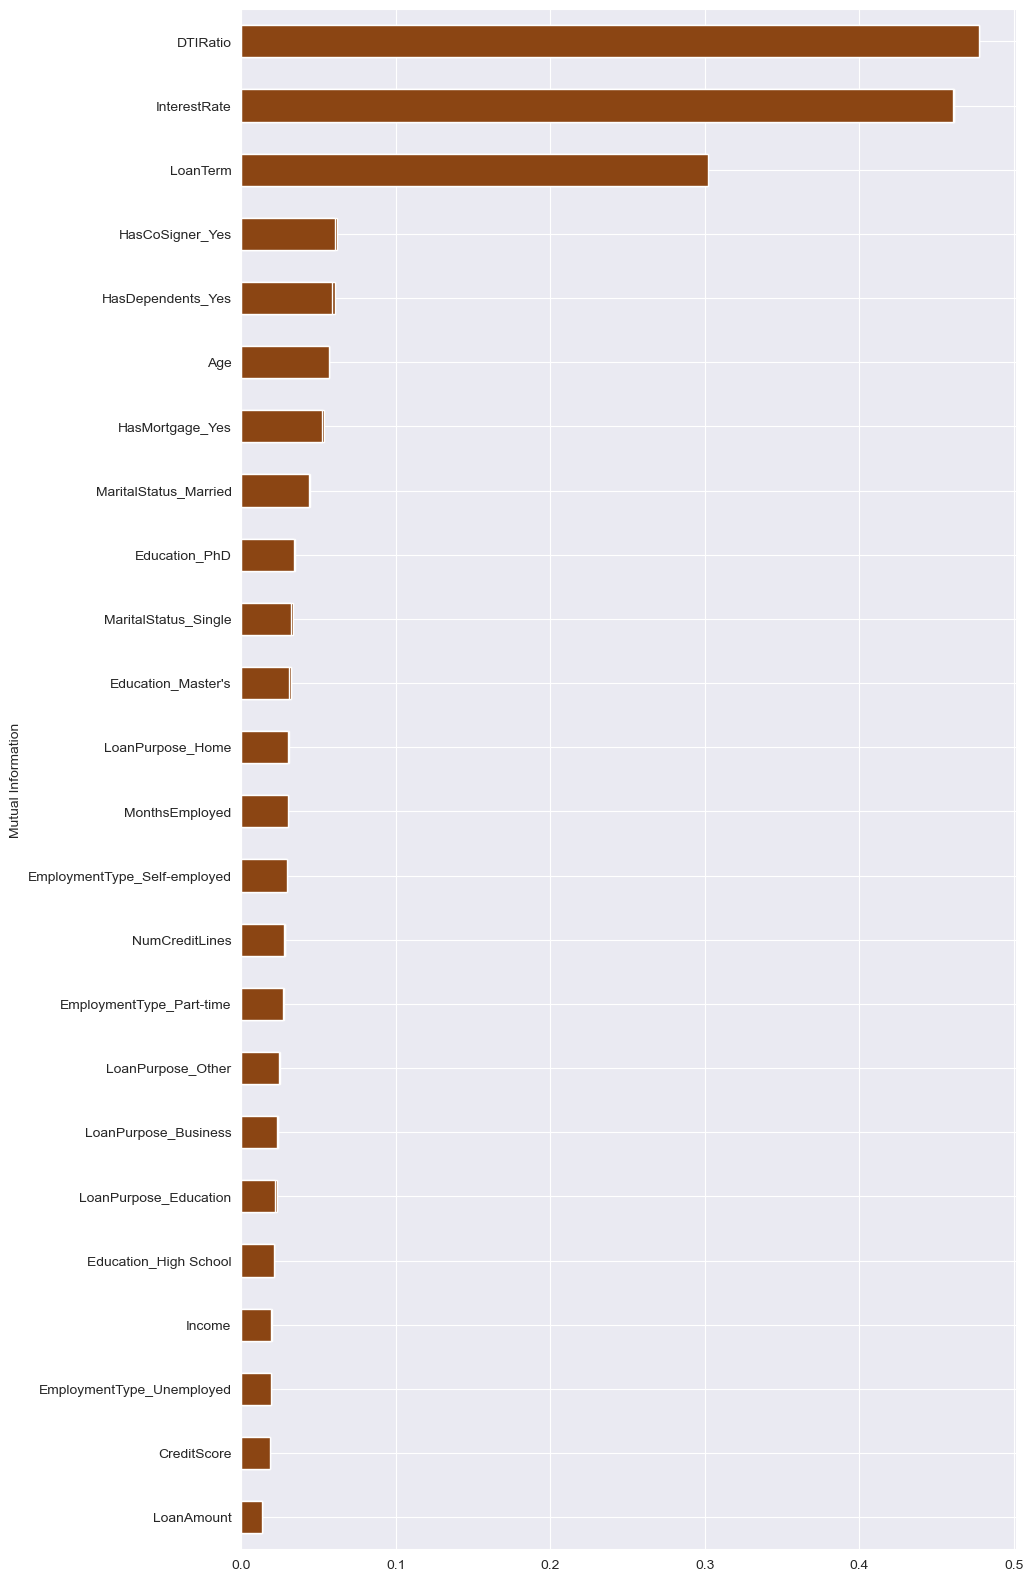

In [83]:
# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif
# to select the features
from sklearn.feature_selection import SelectKBest
mi = mutual_info_classif(X_train, y_train)
mi
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=True).plot.barh(figsize=(10, 20), color = '#8B4513')
plt.ylabel('Mutual Information')
plt.show()


In this code cell, we perform feature importance analysis using Mutual Information (MI) to assess the relevance of each feature to the target variable (loan default).

- We utilize scikit-learn's `mutual_info_classif()` function to compute the mutual information values between each feature and the target variable.
- The resulting mutual information values are then visualized using a horizontal bar plot to illustrate the importance of each feature.

The bar plot displays the mutual information values for each feature, with higher values indicating greater importance in predicting loan default behavior. Features with higher mutual information scores are considered more informative for the classification task.

**This analysis provides the following features which are most relevant for predicting loan default:**
- **DTIRatio**
- **InterestRate**
- **LoanTerm**


##  Addressing Class Imbalance with SMOTE

In [38]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)



In this code cell, we address the issue of class imbalance in the training data using Synthetic Minority Over-sampling Technique (SMOTE). 

- SMOTE is implemented using the `SMOTE` class from the `imblearn.over_sampling` module.
- We create a `SMOTE` object `smote` with a specified `random_state` for reproducibility.
- The `fit_resample()` method is then applied to the training features (`X_train`) and labels (`y_train`) to generate synthetic samples for the minority class (defaulted loans).

SMOTE helps mitigate class imbalance by oversampling the minority class to achieve a more balanced distribution of classes in the training data. This approach prevents the model from being biased towards the majority class and improves its ability to generalize to unseen data.



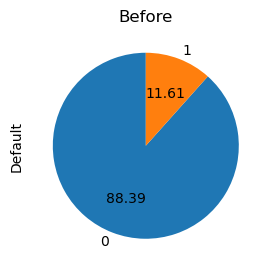

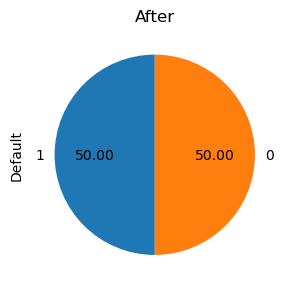

In [66]:
plt.figure(figsize=(3, 5))
df['Default'].value_counts().plot( kind='pie', autopct="%.2f", startangle = 90)
plt.title("Before")
plt.show()

plt.figure(figsize=(3, 5))
y_train.value_counts().plot(kind='pie',autopct="%.2f", startangle = 90)
plt.title("After")
plt.tight_layout()
plt.show()

## Importing Machine Learning Models and Evaluation Metrics

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



In this code cell, we import various machine learning models from scikit-learn and XGBoost for building and evaluating our loan default prediction model. We also import evaluation metrics for assessing model performance.

- `LogisticRegression`, `RandomForestClassifier`, `SVC`, `XGBClassifier`, `KNeighborsClassifier`, `GaussianNB`, and `DecisionTreeClassifier` are imported as potential classifiers for our model.
- `classification_report` and `accuracy_score` are imported from scikit-learn's `metrics` module for evaluating model performance.

These models represent a diverse set of algorithms that can be employed for classification tasks. We will train these models on the training data and evaluate their performance using appropriate metrics.



###  Model Training and Evaluation


In [71]:
print("Testing Accuracy")
print("------------------------------------------------------------------")
# Choose Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGB' : XGBClassifier(),
    'KNN' : KNeighborsClassifier(),
    'NaiveBayes' : GaussianNB(),
    'DTC' : DecisionTreeClassifier()
}
# Train Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}\n")
    print("------------------------------------------------------------------")

Testing Accuracy
------------------------------------------------------------------
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.67      0.78     45170
           1       0.21      0.66      0.32      5900

    accuracy                           0.67     51070
   macro avg       0.57      0.67      0.55     51070
weighted avg       0.85      0.67      0.73     51070


------------------------------------------------------------------
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     45170
           1       0.27      0.12      0.16      5900

    accuracy                           0.86     51070
   macro avg       0.58      0.54      0.54     51070
weighted avg       0.82      0.86      0.84     51070


------------------------------------------------------------------
Classification Report for XGB:
       


In this code cell, we define a dictionary `models` containing various machine learning classifiers initialized with their default parameters. These classifiers include Logistic Regression, Random Forest, XGBoost, K-Nearest Neighbors (KNN), Naive Bayes, and Decision Tree Classifier (DTC).

We then loop through each model in the dictionary, train it on the resampled training data (`X_train`, `y_train`), make predictions on the test data (`X_test`), and evaluate its performance using the `classification_report()` function. 

The classification report provides detailed metrics such as precision, recall, F1-score, and support for each class, as well as the overall accuracy of the model. This allows us to compare the performance of different models and


###  Calculating AUC Scores for Models


In [73]:
from sklearn.metrics import roc_curve, auc

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGB' : XGBClassifier(),
    'KNN' : KNeighborsClassifier(),
    'NaiveBayes' : GaussianNB(),
    'DTC' : DecisionTreeClassifier()
}
auc_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    auc_scores[name] = auc_score


In this code cell, we calculate the Area Under the Receiver Operating Characteristic Curve (AUC) scores for each trained model. AUC is a metric that evaluates the performance of a binary classification model, representing the model's ability to distinguish between positive and negative classes.

We define a dictionary `models` containing various machine learning classifiers initialized with their default parameters. These classifiers include Logistic Regression, Random Forest, XGBoost, K-Nearest Neighbors (KNN), Naive Bayes, and Decision Tree Classifier (DTC).

We then loop through each model in the dictionary, train it on the resampled training data (`X_train`, `y_train`), make probabilistic predictions on the test data (`X_test`), and calculate the AUC score using the `roc_curve()` and `auc()` functions from scikit-learn's `metrics` module.

The AUC scores are stored in the dictionary `auc_scores` with the model names as keys. Higher AUC scores indicate better discriminative ability of the model.



###  Plotting ROC Curves for Models


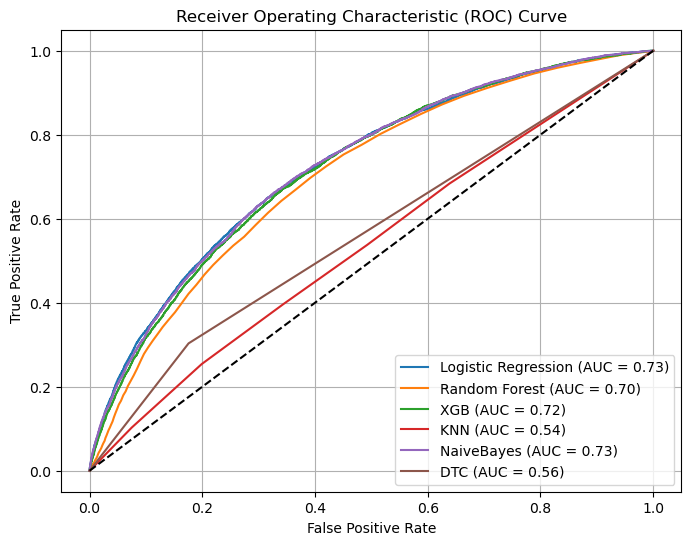

In [74]:
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Plot ROC curve for random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In this code cell, we plot Receiver Operating Characteristic (ROC) curves for each trained model to visualize their performance in distinguishing between positive and negative classes.

We iterate through each model in the `models` dictionary, train it on the resampled training data (`X_train`, `y_train`), make probabilistic predictions on the test data (`X_test`), and calculate the True Positive Rate (TPR) and False Positive Rate (FPR) using the `roc_curve()` function.

The Area Under the Curve (AUC) score is calculated for each model using the `auc()` function, and the ROC curve is plotted using Matplotlib. The AUC score is displayed in the legend for each curve.

A diagonal line representing a random classifier is also plotted for reference.

**Interpretation:**
- **Here for Logistic regression and XGB model the area under the curve is almost same and highest than the others**



### Accuracy of different Classification Models

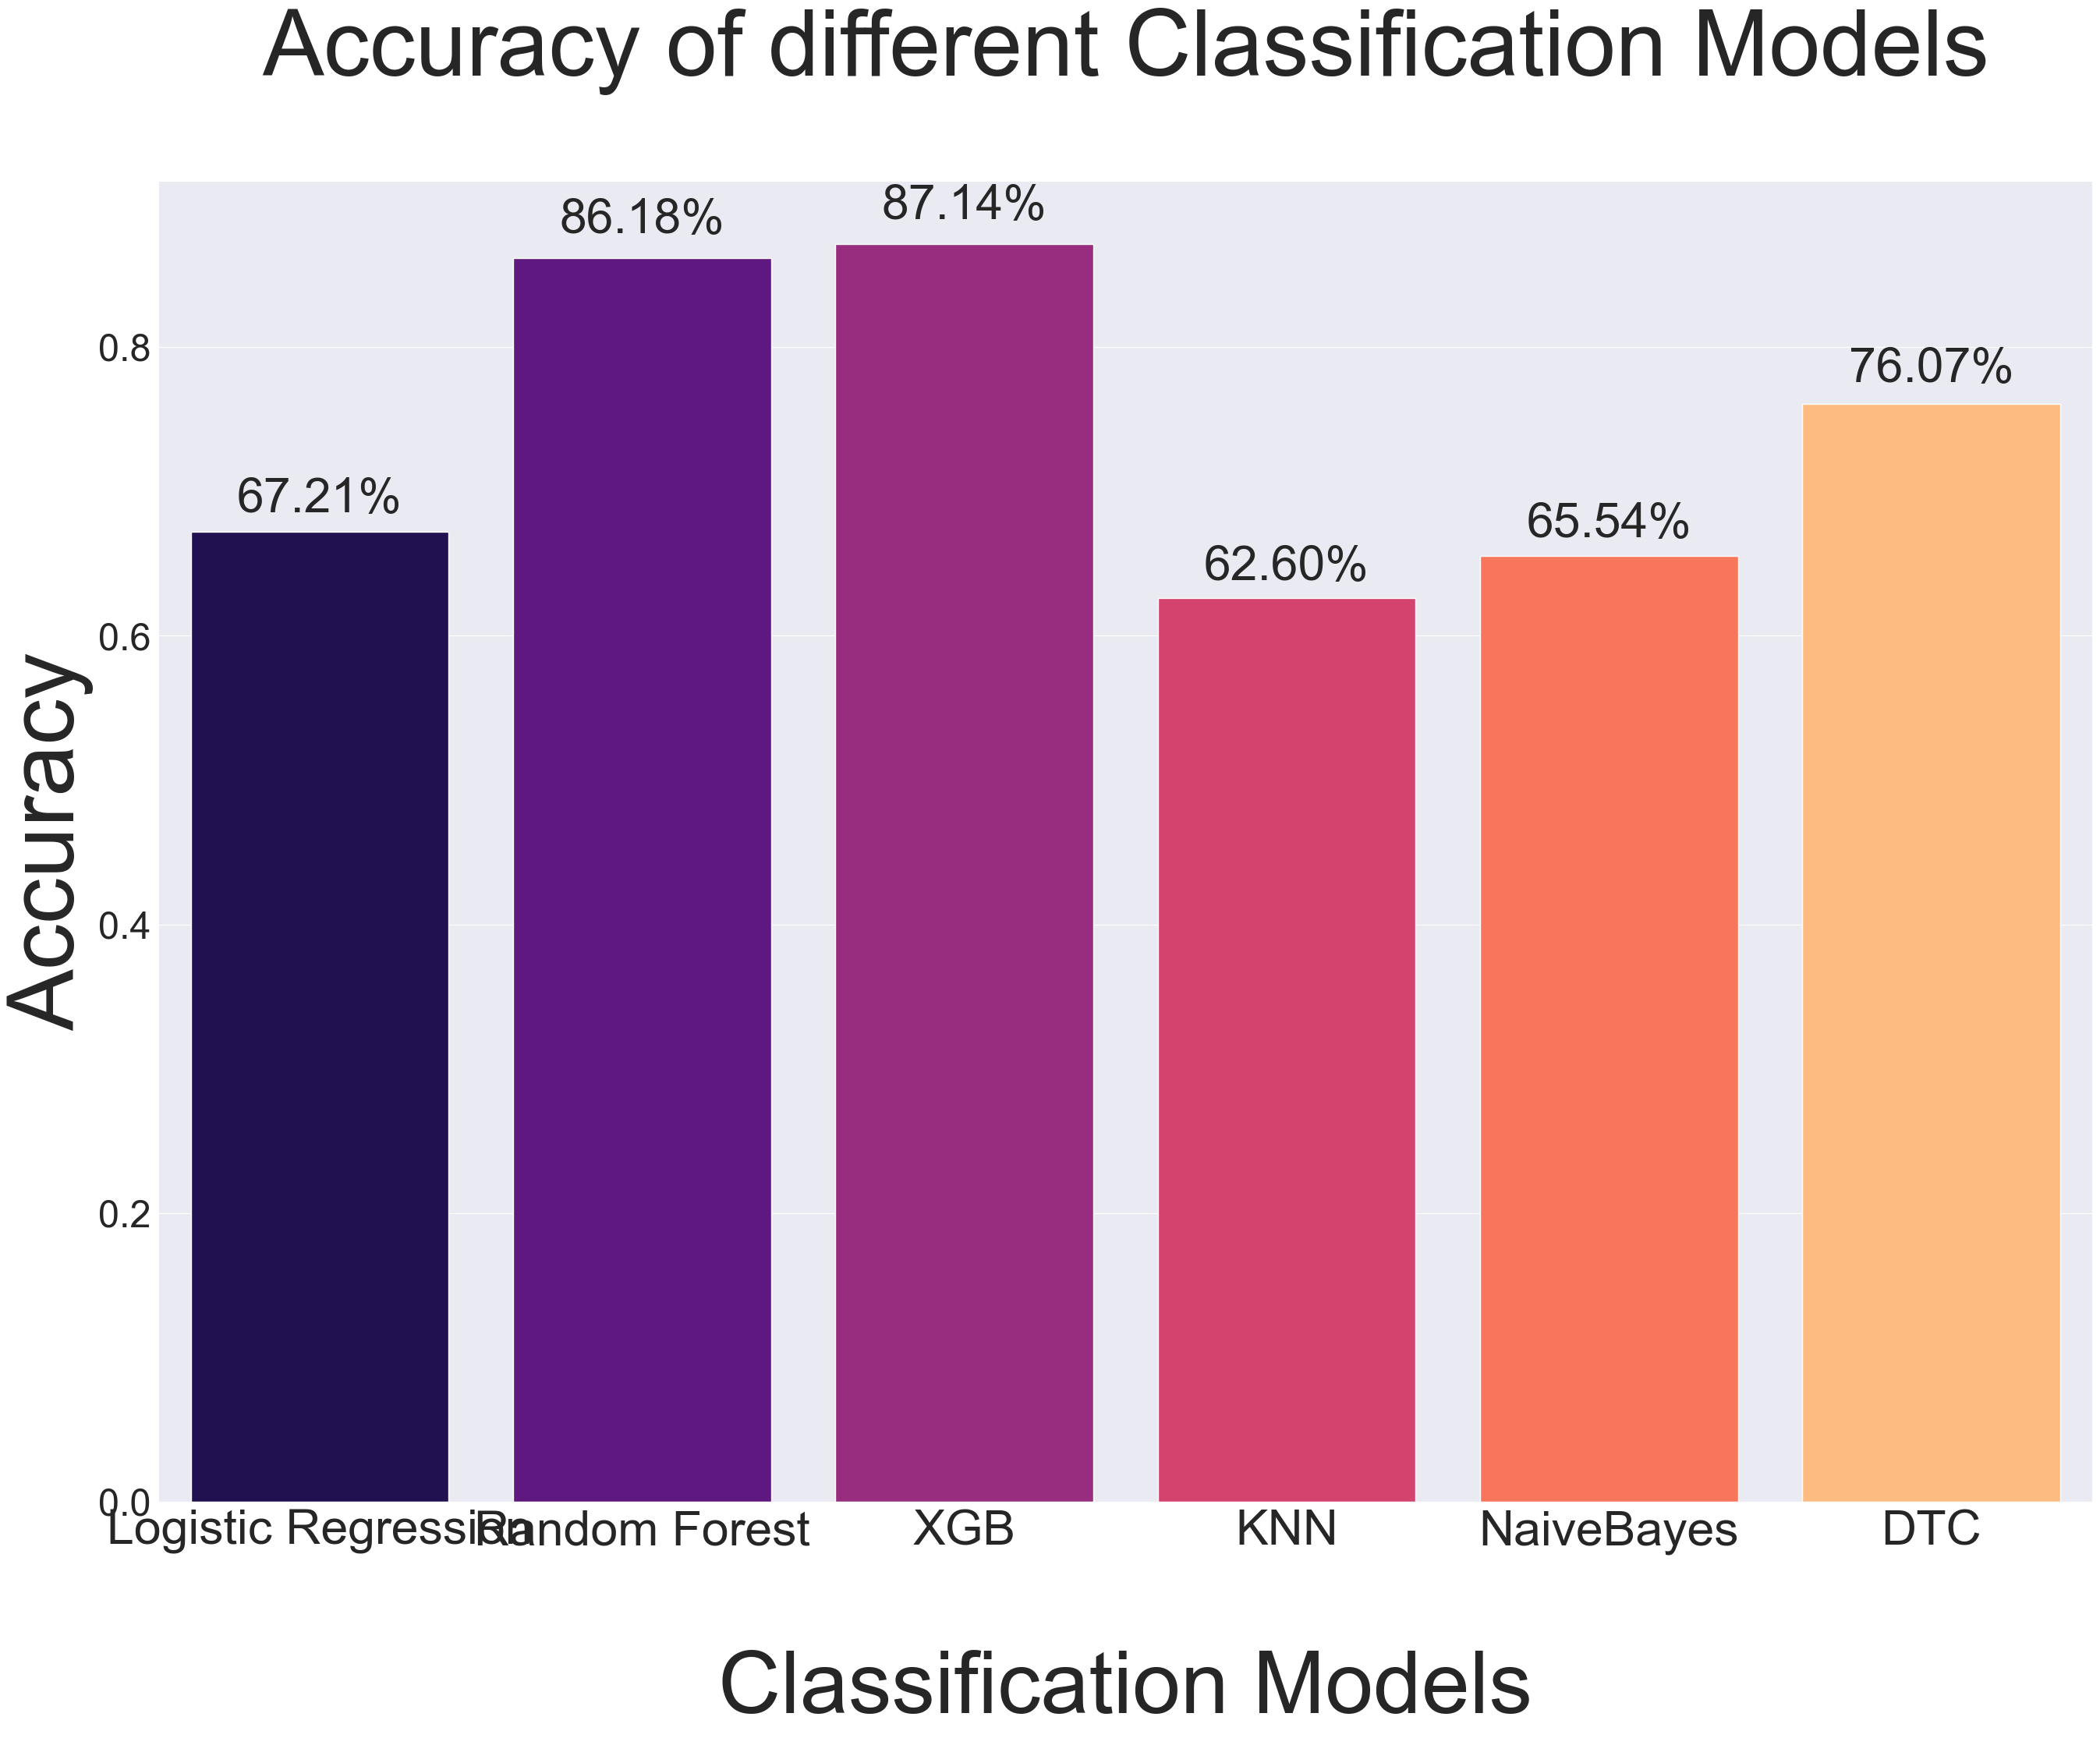

In [76]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGB' : XGBClassifier(),
    'KNN' : KNeighborsClassifier(),
    'NaiveBayes' : GaussianNB(),
    'DTC' : DecisionTreeClassifier()
}

# Generate some sample data
# Replace this with your actual data
# Sample accuracies
acc1, acc2, acc3, acc4, acc5, acc6 = 0.67, 0.86, 0.87, 0.63, 0.66, 0.76

mylist = []
mylist2 = []

# Iterate over models
for model_name, model in models.items():
    # Train the model (assuming you have data for training)
    model.fit(X_train, y_train)  # Replace X_train, y_train with your training data
    # Make predictions
    y_pred = model.predict(X_test)  # Replace X_test with your test data
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)  # Replace y_test with your test labels
    # Append accuracy and model name to lists
    mylist.append(accuracy)
    mylist2.append(model_name)

plt.figure(figsize=(32, 22))
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette="magma", saturation=55)
plt.xlabel("\nClassification Models", fontsize=80)
plt.ylabel("Accuracy", fontsize=85)
plt.title("Accuracy of different Classification Models\n", fontsize=85)
plt.xticks(fontsize=45, horizontalalignment='center', rotation=0)
plt.yticks(fontsize=35)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize=45)

plt.show()

**Interpretation:**
- **Here for XGB model the Accuracy is highest(87.14%) as compare to others **


# Conclusion:

The high accuracy achieved by the XGBoost model demonstrates its effectiveness in distinguishing between defaulted and non-defaulted loans. Additionally, the importance of features such as DTIRatio, Interest Rate, and Loan Term underscores their significant impact on loan default behavior.

Moving forward, financial institutions can leverage the insights gained from this analysis to improve their risk assessment processes and make more informed decisions regarding loan approval and management. By considering key factors such as DTIRatio, Interest Rate, and Loan Term, lenders can better identify and mitigate the risk of loan default, thereby enhancing overall portfolio performance and reducing financial losses."